#Regressió lineal: Opció 1 


En aquest cas es desenvolupa una funció personalitzada per obtenir les dades sobre regressions que més usualment ens demanen a la carrera.

Coef. de regressió: 0.9983
Coord. origen: -0.002
Pendent: 0.042
Inc. origen: 0.00374
Inc. pendent: 0.00173


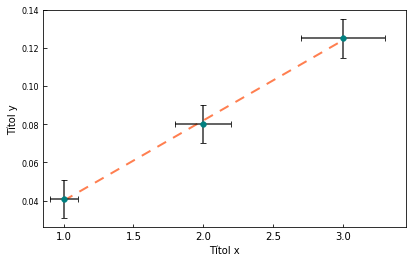

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#per triar xifres significatives
def xs(valor, num_xs):
  import math
  return round(valor, (num_xs - int(math.floor(math.log10(abs(valor))))-1))


"""a i b seran les abcises i ordenades, 
z farà gràfic si se li diu z=True i se li poden donar barres d'errors en x i y """

def full_reg(a,b,e_x=None,e_y=None,z=None, tit_a=None, tit_b=None):
  #llibreries
  import numpy as np
  from sklearn.linear_model import LinearRegression
  import matplotlib.pyplot as plt
  #dades
  x = np.array(a).reshape((-1, 1))
  y = np.array(b)
  #creació del model adequat per x i y
  model = LinearRegression().fit(x, y)
  #mirem la recta
  r_sq = model.score(x, y)
  print('Coef. de regressió:', xs(r_sq,4))
  print('Coord. origen:', xs(model.intercept_, 3))
  print('Pendent:', xs(float(model.coef_),3))

  #incerteses model:
  S_xx=np.std(x)**2*(len(x)-1)
  S_yy=np.std(y)**2*(len(y)-1)
  S_x_y=np.sqrt((S_yy-(S_xx*float(model.coef_)**2))/(len(x)-2))
  #origen:
  x_sq=[]
  for i in x:
    x_sq.append(i**2)
  sq_x_mins_mean = []
  for i in x:
    sq_x_mins_mean.append((i-np.mean(x))**2)
  inc_or1 = S_x_y * np.sqrt((sum(x_sq))/(len(x)*(sum(sq_x_mins_mean))))
  inc_or2 = S_x_y * np.sqrt((sum(x_sq))/(len(x)*(len(x)-1)*np.std(x)**2))

  print('Inc. origen:', xs(float(inc_or2),3))
  #pendent
  inc_pen = S_x_y/np.sqrt(S_xx)
  print('Inc. pendent:', xs(inc_pen, 3))


  #per predir dades teòriques a partir de la regressió, és necessari per graficar la regressió després:
     #si es volen les mateixes x de la regressió:
  y_pred = model.predict(x)
  """
  print('Resposta predida per les mateixes x:', y_pred, sep='\n')
  """

     #per fer prediccions amb altres x, per exemple de 0 a 4
  """
  x_new = np.arange(5).reshape((-1, 1))
  y_new = model.predict(x_new)
  print(y_new)
  """
  if z==True:
    fig = plt.figure(figsize=(6.5,4))
    ax = fig.add_subplot(111)
    if (min(e_x)==0 or min(e_y)==0):
      ax = plt.axes(xlim=(float(min(x))-0.4*float(min(x)),float(max(x))+0.4*float(min(x))),
                  ylim=(float(min(y))-0.4*float(min(y)),float(max(y))+0.4*float(min(y)))
                  )
    elif y[0]<y[-1]:
      ax = plt.axes(xlim=(float(min(x))-1.5*float(e_x[0]),float(max(x))+1.5*float(e_x[-1])),
                    ylim=(float(min(y))-1.5*float(e_y[0]),float(max(y))+1.5*float(e_y[-1]))
                    )
    else:
      ax = plt.axes(xlim=(float(min(x))-1.5*float(e_x[-1]),float(max(x))+1.5*float(e_x[0])),
                    ylim=(float(min(y))-1.5*float(e_y[-1]),float(max(y))+1.5*float(e_y[0]))
                    )
    ax.set(xlabel=tit_a, ylabel=tit_b)
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(8)  #mida lletres eix y
    ax.plot(x,y_pred, color='coral', lw=2, linestyle=(0, (5, 4)), zorder=1)
    ax.scatter(x,y, color= 'teal', lw=0.3, zorder=3)
    for i in range(len(x)):
      ax.errorbar(x[i], y[i], xerr=e_x[i], yerr=e_y[i],capsize=3 ,color='k', alpha =0.8,zorder=2)
    #plt.show()
    plt.savefig(tit_a+' vs '+tit_b,dpi=1000) 
    #si s'executa amb colab, a l'esquerra del tot hi ha índex, snippets i documents (aquest últim apartat té forma de carpeta)
    #a documents es pot trobar el fitxer .png creat amb el gràfic en alta resolució
    
x=[1,2,3]
y=[0.041,0.08,0.125]
errx=[0.1,0.2,0.3]
erry=[0.01,0.01,0.01]
full_reg(x, y,errx, erry, True, 'Títol x', 'Títol y')


#Regressió lineal: Opció 1.2 (versió millorada)

Pendent: 0.042
Ordenada a l'origen: -0.002
Coeficient de regressió: 0.9983
Incertesa de l'ordenada a l'origen: 0.00374
Incertesa del pendent: 0.00173


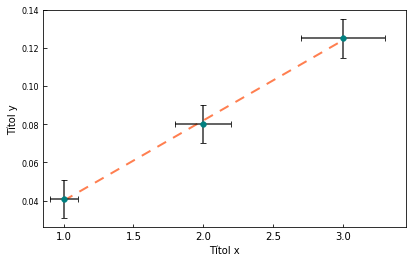

In [ ]:
class Regr:
  def xs(self, valor, num_xs):
    import math
    return round(valor, (num_xs - int(math.floor(math.log10(abs(valor))))-1))
class Regr(Regr):
  def pend(self, a, b):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x = np.array(a).reshape((-1, 1))
    y = np.array(b)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    return self.xs(float(model.coef_),3)
  def ordor(self, a, b):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x = np.array(a).reshape((-1, 1))
    y = np.array(b)
    model = LinearRegression().fit(x, y)
    return self.xs(model.intercept_, 3)
  def cf_reg(self, a, b):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x = np.array(a).reshape((-1, 1))
    y = np.array(b)
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    return self.xs(r_sq, 4)
  def i_ordor(self, a, b):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x = np.array(a).reshape((-1, 1))
    y = np.array(b)
    S_xx=np.std(x)**2*(len(x)-1)
    S_yy=np.std(y)**2*(len(y)-1)
    model = LinearRegression().fit(x, y)
    S_x_y=np.sqrt((S_yy-(S_xx*float(model.coef_)**2))/(len(x)-2))
    x_sq=[]
    for i in x:
      x_sq.append(i**2)
    sq_x_mins_mean = []
    for i in x:
      sq_x_mins_mean.append((i-np.mean(x))**2)
    inc_or1 = S_x_y * np.sqrt((sum(x_sq))/(len(x)*(sum(sq_x_mins_mean))))
    inc_or2 = S_x_y * np.sqrt((sum(x_sq))/(len(x)*(len(x)-1)*np.std(x)**2))
    return self.xs(float(inc_or2), 3)
  def i_pend(self, a, b):
    import numpy as np
    from sklearn.linear_model import LinearRegression
    x = np.array(a).reshape((-1, 1))
    y = np.array(b)
    S_xx=np.std(x)**2*(len(x)-1)
    S_yy=np.std(y)**2*(len(y)-1)
    model = LinearRegression().fit(x, y)
    S_x_y=np.sqrt((S_yy-(S_xx*float(model.coef_)**2))/(len(x)-2))
    inc_pen = S_x_y/np.sqrt(S_xx)
    return self.xs(inc_pen, 3)
  def graf(self, a, b, e_x, e_y, tit_a, tit_b):
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    import numpy as np
    x = np.array(a).reshape((-1, 1))
    y = np.array(b)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    fig = plt.figure(figsize=(6.5,4))
    ax = fig.add_subplot(111)
    if (min(e_x)==0 or min(e_y)==0):
      ax = plt.axes(xlim=(float(min(x))-0.4*float(min(x)),float(max(x))+0.4*float(min(x))),
                  ylim=(float(min(y))-0.4*float(min(y)),float(max(y))+0.4*float(min(y)))
                  )
    elif y[0]<y[-1]:
      ax = plt.axes(xlim=(float(min(x))-1.5*float(e_x[0]),float(max(x))+1.5*float(e_x[-1])),
                    ylim=(float(min(y))-1.5*float(e_y[0]),float(max(y))+1.5*float(e_y[-1]))
                    )
    else:
      ax = plt.axes(xlim=(float(min(x))-1.5*float(e_x[-1]),float(max(x))+1.5*float(e_x[0])),
                    ylim=(float(min(y))-1.5*float(e_y[-1]),float(max(y))+1.5*float(e_y[0]))
                    )
    ax.set(xlabel=tit_a, ylabel=tit_b)
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')
    for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(8)  #mida lletres eix y
    ax.plot(x,y_pred, color='coral', lw=2, linestyle=(0, (5, 4)), zorder=1)
    ax.scatter(x,y, color= 'teal', lw=0.3, zorder=3)
    for i in range(len(x)):
      ax.errorbar(x[i], y[i], xerr=e_x[i], yerr=e_y[i],capsize=3 ,color='k', alpha =0.8,zorder=2)
    plt.savefig(tit_a+' vs '+tit_b,dpi=1000) 


x=[1,2,3]
y=[0.041,0.08,0.125]
errx=[0.1,0.2,0.3]
erry=[0.01,0.01,0.01]
print('Pendent:',Regr().pend(x,y))
print('Ordenada a l\'origen:',Regr().ordor(x,y))
print('Coeficient de regressió:',Regr().cf_reg(x,y))
print('Incertesa de l\'ordenada a l\'origen:',Regr().i_ordor(x,y))
print('Incertesa del pendent:',Regr().i_pend(x,y))
Regr().graf(x, y, errx, erry, 'Títol x', 'Títol y')

#Regressió: Opció 2

En aquest cas se segueixen els passos fets al projecte de Coursera anomenat **Linear Regression with Python**

##Passos seguits

###Introduction

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

###Dataset

Tenim un sistema de tipus:
$y=b+\begin{pmatrix}
  x_1 & \cdots&x_n
\end{pmatrix}
\begin{pmatrix}
  w_1\\
  \vdots\\
  w_n
\end{pmatrix}$

Amb $n$ variables a tenir en compte. Tot i així resulta senzill veure que çes una equació lineal. Es treballa amb les matrius $X$ i $W$ respectivament.

In [ ]:
def generate_examples(num=1000):
  W = [1.0, -3.0]
  b = 1.0
  W = np.reshape(W, (2, 1))
  X = np.random.randn(num, 2)
  y = b + np.dot(X, W) + np.random.randn() #l'últim terme serveix per generar soroll i no tenir dades perfectes
  y = np.reshape(y, (num, 1))
  return X,y
X,y=generate_examples()
print(X.shape, y.shape)
print(X[0], y[0])

(1000, 2) (1000, 1)
[-1.1551597   1.37685962] [-3.93870766]


###Initialize Parameters

L'error en la mitjana dels quadrats per $n$ casos ve donada per:

$$\mathbf{J}=\frac{1}{2m}\sum_{i=0}^n(y-\hat{y})^2$$

El que ens interessa és minimitzar $\mathbf{J}$. Recordem que $\hat{y}$ és el valor esperat (segons la regressió lineal).

In [ ]:
class Model:
  def __init__(self, num_var):
    self.num_var = num_var
    self.W = np.random.randn(num_var, 1)
    self.b = np.random.randn()
model = Model(2)
print(model.W)
print(model.b)

[[-0.63402487]
 [-0.37753718]]
0.5772226172489197


###Forward Pass

L'algoritme Gradient Descent es pot resumir en 4 senzills passos:
* Obtenir valors $\hat{y}$ per $X$ donades $W$ i $b$.
* Compilar l'error en la mitjana per $y$ i $\hat{y}$.
* Trobar els gradients de l'error repecte de $W$ i $b$.
* Actualitzar els valors de $W$ i $b$ a partir de substreure els valors de gradient obtinguts en el pas previ.

Simplificant l'equaciço de regressiço a una sola variable independent s'obtindria: $y=wx$. En graficar $\mathbf{J}$ en funciço de $w$ s'obtindria una paràbola amb cert mínim. Ens interessa trobar aquest mínim però ja que computacionalment anar mirant tots els valors d'una llista seria molt ineficient, s'utilitza la derivada numèrica:

$$\frac{d\mathbf{J}}{dw}=\frac{\delta\mathbf{J}}{\delta w}=\lim_{\epsilon\to 0}\frac{\mathbf{J}(w+\epsilon)-\mathbf{J}(w)}{\epsilon}$$

In [ ]:
class Model(Model):
  def forward_pass(self, X):
    y_hat = self.b + np.dot(X, self.W)
    return y_hat
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])

(1000, 1) [0.19584193]


###Compute loss

Recodrem que l'error en la mitjana dels quadrats per $n$ casos ve donada per:

$$\mathbf{J}=\frac{1}{2m}\sum_{i=0}^n(y-\hat{y})^2$$
Per tant ara ens disposem a calcular-la.

In [ ]:
class Model(Model):
  def compute_loss(self, y_hat, y_true):
    loss = np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
    return loss
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)
print(loss)

5.816331650534175


###Backward Pass

El gradient de l'error respecte el biaix pot ser calculat co:
$$\frac{d\mathbf{J}}{db}=\frac{1}{m}\sum_{i=1}^m \left( y^{(i)}-\hat{y}^{(i)} \right)$$
$$\frac{d\mathbf{J}}{dW_j}=\frac{1}{m}\sum_{i=1}^m \left( y^{(i)}-\hat{y}^{(i)} \right)\cdot x_j^{(i)}$$

In [ ]:
class Model(Model):
  def backward_pass(self, X, y_true, y_hat):
    m = y_true.shape[0]
    db = (1/m) * np.sum(y_hat - y_true)
    dW = (1/m) * np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
    return dW, db

model = Model(2)
X,y = generate_examples()
y_hat = model.forward_pass(X)
dW,db = model.backward_pass(X, y, y_hat)
print(dW, db)

[0.21958988 1.40062917] -1.587611878887775


###Update parameters

In [ ]:
class Model(Model):
  def update_params(self, dW, db, lr):
    self.W = self.W - lr * np.reshape(dW, self.W.shape)
    self.b = self.b - db

###Training Loop

Iter: 0, Loss: 10.3094
Iter: 100, Loss: 5.4255
Iter: 200, Loss: 3.0307
Iter: 300, Loss: 1.6931
Iter: 400, Loss: 0.9458
Iter: 500, Loss: 0.5284
Iter: 600, Loss: 0.2952
Iter: 700, Loss: 0.1649
Iter: 800, Loss: 0.0921
Iter: 900, Loss: 0.0515


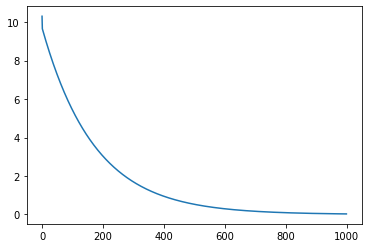

In [ ]:
class Model(Model):
  def train(self, x_train, y_train, iterations, lr):
    losses = []
    for i in range(0, iterations):
      y_hat = self.forward_pass(x_train)
      loss = self.compute_loss(y_hat, y_train)
      dW,db = self.backward_pass(x_train, y_train, y_hat)
      self.update_params(dW, db, lr)
      losses.append(loss)
      if i%int(iterations/10)==0:
        print('Iter: {}, Loss: {:.4f}'.format(i, loss))
    return losses
model = Model(2)
x_train,y_train = generate_examples()
losses = model.train(x_train, y_train, 1000, 3e-3)
plt.plot(losses);

###Predictions

(500, 2) (500, 1)


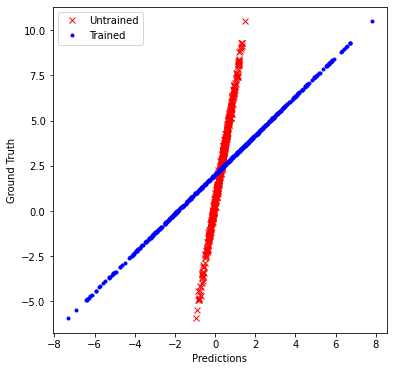

In [ ]:
model_untrained = Model(2)
x_test,y_test = generate_examples(500)
print(x_test.shape, y_test.shape)
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)
plt.figure(figsize = (6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

##Aquí s'executa de cop

(1000, 2) (1000, 1)
[-1.05879234  1.11096873] [-2.57130819]
[[0.10922168]
 [0.82453384]]
-1.2500245190779244
(1000, 1) [0.6762451]
5.458580954626716
[-0.95002386  2.10590198] -2.756552194151677
Iter: 0, Loss: 4.6846
Iter: 100, Loss: 2.6522
Iter: 200, Loss: 1.5023
Iter: 300, Loss: 0.8510
Iter: 400, Loss: 0.4821
Iter: 500, Loss: 0.2731
Iter: 600, Loss: 0.1547
Iter: 700, Loss: 0.0876
Iter: 800, Loss: 0.0496
Iter: 900, Loss: 0.0281
(500, 2) (500, 1)


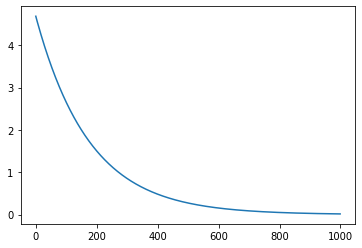

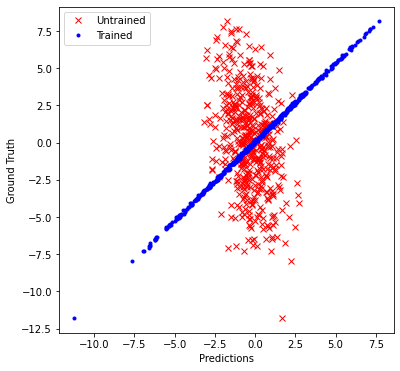

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#dataset
def generate_examples(num=1000):
  W = [1.0, -3.0]
  b = 1.0
  W = np.reshape(W, (2, 1))
  X = np.random.randn(num, 2)
  y = b + np.dot(X, W) + np.random.randn() #l'últim terme serveix per generar soroll i no tenir dades perfectes
  y = np.reshape(y, (num, 1))
  return X,y
X,y=generate_examples()
print(X.shape, y.shape)
print(X[0], y[0])
#initialize parameters
class Model:
  def __init__(self, num_var):
    self.num_var = num_var
    self.W = np.random.randn(num_var, 1)
    self.b = np.random.randn()
model = Model(2)
print(model.W)
print(model.b)
#forward pass
class Model(Model):
  def forward_pass(self, X):
    y_hat = self.b + np.dot(X, self.W)
    return y_hat
y_hat = Model(2).forward_pass(X)
print(y_hat.shape, y_hat[0])
#compute loss
class Model(Model):
  def compute_loss(self, y_hat, y_true):
    loss = np.sum(np.square(y_hat - y_true))/(2*y_hat.shape[0])
    return loss
model = Model(2)
y_hat = model.forward_pass(X)
loss = model.compute_loss(y_hat, y)
print(loss)
#backward pass
class Model(Model):
  def backward_pass(self, X, y_true, y_hat):
    m = y_true.shape[0]
    db = (1/m) * np.sum(y_hat - y_true)
    dW = (1/m) * np.sum(np.dot(np.transpose(y_hat - y_true), X), axis=0)
    return dW, db

model = Model(2)
X,y = generate_examples()
y_hat = model.forward_pass(X)
dW,db = model.backward_pass(X, y, y_hat)
print(dW, db)
#update parameters
class Model(Model):
  def update_params(self, dW, db, lr):
    self.W = self.W - lr * np.reshape(dW, self.W.shape)
    self.b = self.b - db
#training loop
class Model(Model):
  def train(self, x_train, y_train, iterations, lr):
    losses = []
    for i in range(0, iterations):
      y_hat = self.forward_pass(x_train)
      loss = self.compute_loss(y_hat, y_train)
      dW,db = self.backward_pass(x_train, y_train, y_hat)
      self.update_params(dW, db, lr)
      losses.append(loss)
      if i%int(iterations/10)==0:
        print('Iter: {}, Loss: {:.4f}'.format(i, loss))
    return losses
model = Model(2)
x_train,y_train = generate_examples()
losses = model.train(x_train, y_train, 1000, 3e-3)
plt.plot(losses);
#predictions
model_untrained = Model(2)
x_test,y_test = generate_examples(500)
print(x_test.shape, y_test.shape)
preds_untrained = model_untrained.forward_pass(x_test)
preds_trained = model.forward_pass(x_test)
plt.figure(figsize = (6,6))
plt.plot(preds_untrained, y_test, 'rx', label = 'Untrained')
plt.plot(preds_trained, y_test, 'b.', label = 'Trained')
plt.legend()
plt.xlabel('Predictions')
plt.ylabel('Ground Truth')
plt.show()

#Regressió: Opció 3

En aquest cas se segueixen els passos explicats al projecte de Coursera anomenat **Linear Regression with Numpy and Python**

##Passos seguits

###Load the Data and Libraries

In [ ]:
import matplotlib.pyplot as plt   #per plotejar
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns   #per plotejar
plt.rcParams['figure.figsize'] = (12,8)

data = pd.read_csv('bike_sharing_data.txt')
data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


###Visualize the Data

Text(0.5, 1.0, 'Profits in $10000s vs City Population in 10000s')

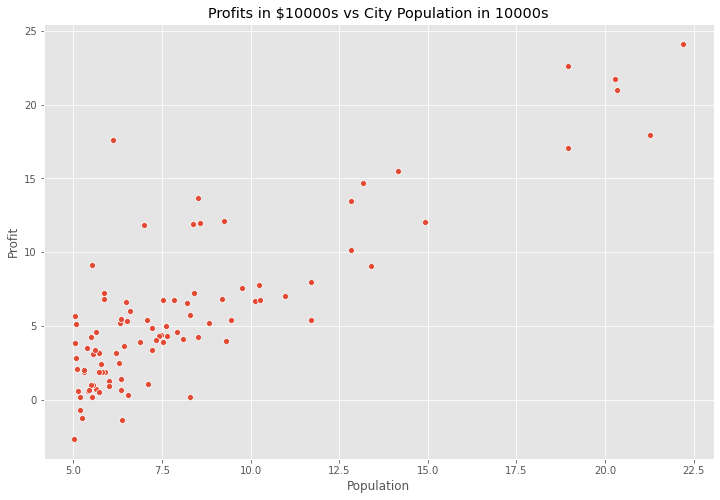

In [ ]:
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profits in $10000s vs City Population in 10000s')

###Compute the Cost $J(\theta)$

L'objectiu de la regressió és minimitzar la funció cost:
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^m \left( h_{\theta} \left( x^{(i)} \right) - y^{(i)} \right)^2$$
on $h_{\theta}(x)$ és la hipòtesis i segueix el model lineal:
$$h_{\theta}(x)=\theta^{\,T}x=\theta_0+\theta_1 x_1$$

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y)**2
  return 1/(2*m) * np.sum(error)

In [ ]:
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))
cost_function(X, y, theta)

32.072733877455676

###Gradient Descent

Per tal de minimitzar la funció cost $J(\theta)$ s'actualitza la funció de l'apartat anterior fins a la convergència.
$$\theta_j = \theta_j - \alpha \frac{1}{m}\sum_{i=1}^m \left( h_{\theta}\left( x^{(i)} \right) - y^{(i)} \right)x_j^{(i)}$$
Actualitza $\theta_j$ simultàniament per a tota $j$

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha*(1/m)*error
    costs.append(cost_function(X,y,theta))
  return theta, costs
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print('h(x) = {} + {}x1'.format(str(round(theta[0,0], 2)), 
                                str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


###Visualising the Cost Function $J(\theta)$

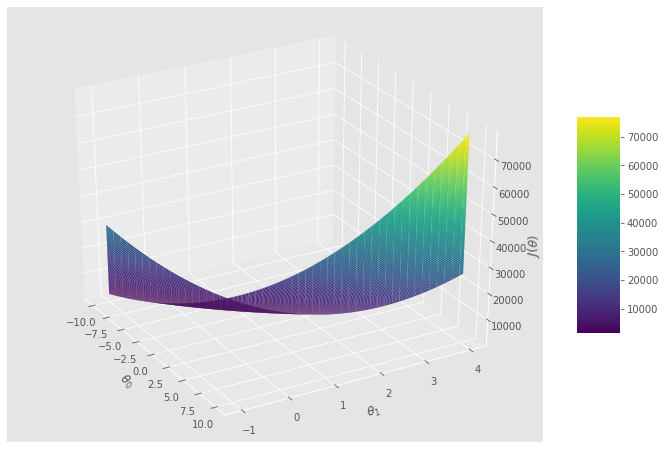

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i,j] = cost_function(X, y, t)

fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.view_init(30, 330)

plt.show()

###Plotting the Convergence

Graficar $J(\theta)$ respecte el nombre d'iteracions al *gradient descent*

Text(0.5, 1.0, 'Values of the Cost Function over the Iterations of Gradient Descent')

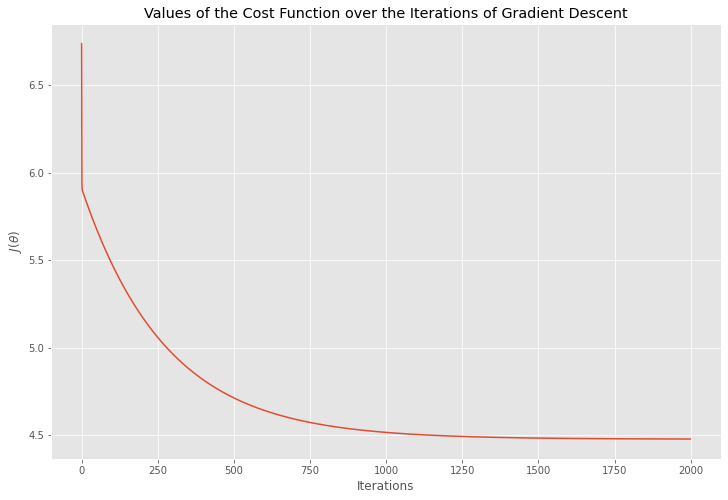

In [ ]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')
plt.title('Values of the Cost Function over the Iterations of Gradient Descent')

###Training Data with Linear Regression Fit

In [ ]:
theta.shape

(2, 1)

In [ ]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'Linear Regression Fit')

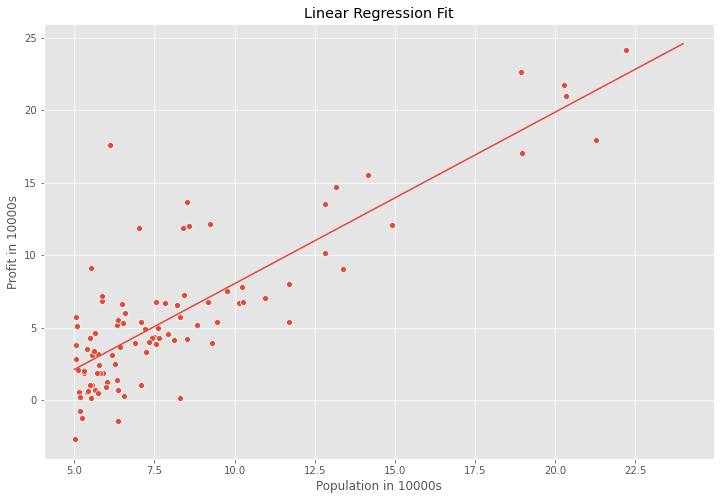

In [ ]:
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5,25)] #per entendre el rang veure d'on a on va ek primer gràfic de tots
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000s')
plt.title('Linear Regression Fit')

###Infered using optimized $\theta$ values

$$h_{\theta}(x) = \theta^{\,T}x$$

In [ ]:
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return  y_pred

In [ ]:
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print('For a population of 40,000 people, the model predicts a profit of $'+str(round(y_pred_1, 0)))

For a population of 40,000 people, the model predicts a profit of $9408.0


In [ ]:
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
print('For a population of 83,000 people, the model predicts a profit of $'+str(round(y_pred_2, 0)))

For a population of 83,000 people, the model predicts a profit of $60243.0


##Aquí s'executa de cop

h(x) = -3.79 + 1.18x1
(2, 1) [[-3.78806857]
 [ 1.18221277]]
For a population of 40,000 people, the model predicts a profit of $9408.0
For a population of 83,000 people, the model predicts a profit of $60243.0


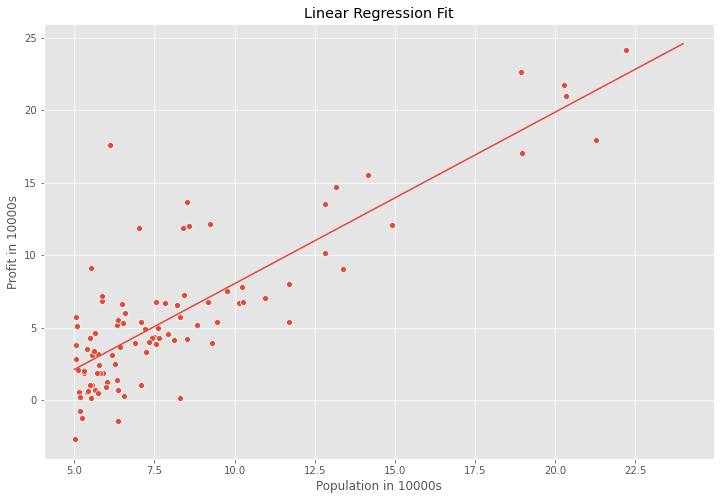

In [ ]:
#load the data and libraries
import matplotlib.pyplot as plt   #per plotejar
plt.style.use('ggplot')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns   #per plotejar
plt.rcParams['figure.figsize'] = (12,8)

data = pd.read_csv('bike_sharing_data.txt')
data.head()
"""
#visualize the data
ax = sns.scatterplot(x='Population', y='Profit', data=data)
ax.set_title('Profits in $10000s vs City Population in 10000s')
"""
#compute the cost $J(\theta)$
def cost_function(X, y, theta):
  m = len(y)
  y_pred = X.dot(theta)
  error = (y_pred - y)**2
  return 1/(2*m) * np.sum(error)
m = data.Population.values.size
X = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2,1))
cost_function(X, y, theta)

#gradient descent
def gradient_descent(X, y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = X.dot(theta)
    error = np.dot(X.transpose(), (y_pred - y))
    theta -= alpha*(1/m)*error
    costs.append(cost_function(X,y,theta))
  return theta, costs
theta, costs = gradient_descent(X, y, theta, alpha=0.01, iterations=2000)
print('h(x) = {} + {}x1'.format(str(round(theta[0,0], 2)), 
                                str(round(theta[1, 0], 2))))

#visualizing the cost function $J(\theta)$
from mpl_toolkits.mplot3d import Axes3D

theta_0 = np.linspace(-10,10,100)
theta_1 = np.linspace(-1,4,100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])
    cost_values[i,j] = cost_function(X, y, t)
"""
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap='viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
ax.view_init(30, 330)

plt.show()

#plotting the convergence
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel(r'$J(\theta)$')
plt.title('Values of the Cost Function over the Iterations of Gradient Descent')
plt.show()
"""
#training data with linear regression fit
print(theta.shape, theta)
theta = np.squeeze(theta)
sns.scatterplot(x='Population', y='Profit', data=data)

x_value = [x for x in range(5,25)] #per entendre el rang veure d'on a on va ek primer gràfic de tots
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value, y_value)

plt.xlabel('Population in 10000s')
plt.ylabel('Profit in 10000s')
plt.title('Linear Regression Fit')

#infered using optimized $\theta$ values
def predict(x, theta):
  y_pred = np.dot(theta.transpose(), x)
  return  y_pred
y_pred_1 = predict(np.array([1,4]), theta) * 10000
print('For a population of 40,000 people, the model predicts a profit of $'+str(round(y_pred_1, 0)))
y_pred_2 = predict(np.array([1,8.3]), theta) * 10000
print('For a population of 83,000 people, the model predicts a profit of $'+str(round(y_pred_2, 0)))